In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
def combine_series(generators, initial_observations):
    final_series = list(initial_observations)
    for generator in generators:
        final_series  = generator(final_series)
    return final_series[len(initial_observations):]

In [73]:
def mc_generator_normal_dist(size):
    return list(np.random.randn(size))

def mc_generator_AR(prev_values, size_next, parameters, constant, residual_generator):
    residuals = list(residual_generator(size_next))
    mc_ar = prev_values
    n_lag = len(parameters)
    n_prev_values = len(prev_values)
    for i in range(size_next):
        multiplier = mc_ar[i+n_prev_values-n_lag:i+n_prev_values]
        multiplier.reverse()
        mc_ar.append(np.dot(parameters, multiplier) + constant + residuals[i])
    return mc_ar


In [74]:
mc_generators = [
    lambda prev_v: mc_generator_AR(prev_values=prev_v, size_next=100, parameters=[0], constant=0, residual_generator=mc_generator_normal_dist),
    lambda prev_v: mc_generator_AR(prev_values=prev_v, size_next=100, parameters=[1], constant=0, residual_generator=mc_generator_normal_dist),
    # lambda prev_v: mc_generator_AR(prev_values=prev_v, size_next=100, parameters=[1.3, -0.7], constant=0, residual_generator=mc_generator_normal_dist),
]

In [75]:
initial_observations = list(np.zeros(10))
mc_series = combine_series(mc_generators, initial_observations)

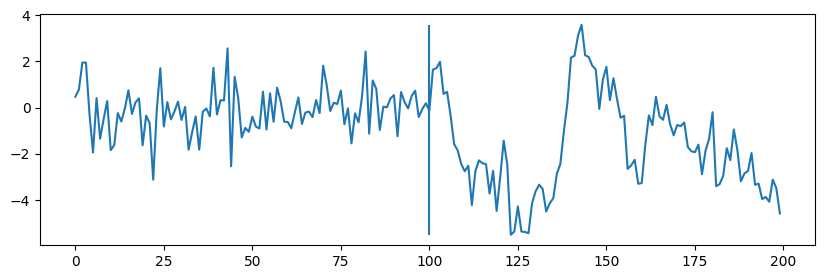

In [78]:
plt.figure(figsize=(10, 3))
plt.plot(mc_series)
plt.vlines([100], ymin=np.min(mc_series), ymax=np.max(mc_series), colors='r')
plt.show()